# Anomaly Detection Algorithm

###### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
%matplotlib inline

###### Loading data 

(307, 2)


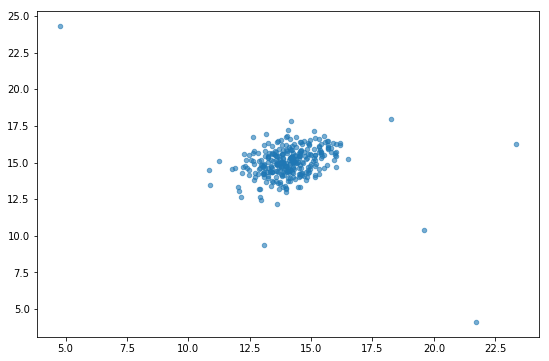

In [2]:
data = loadmat('ex8data1.mat')
X = data['X']
print(X.shape)

fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(X[:,0], X[:,1], alpha = 0.6, s=20)

###### Calculating mean and variance 

In [3]:
def calculateGaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    
    return mu, sigma

mu, sigma = calculateGaussian(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

###### Using already marked data for setting probability threshold 

In [4]:
Xval = data['Xval']
yval = data['yval']

Xval.shape, yval.shape

((307, 2), (307, 1))

###### Probability that data point belong to a normal distribution 

In [5]:
dist = stats.norm(mu[0], sigma[0])
dist.pdf(X[:,0])[0:50]

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ,
       0.21716057, 0.21760472, 0.20141857, 0.20157497, 0.21711385,
       0.21758775, 0.21695576, 0.2138258 , 0.21057069, 0.1173018 ,
       0.20765108, 0.21717452, 0.19510663, 0.21702152, 0.17429399,
       0.15413455, 0.21000109, 0.20223586, 0.21031898, 0.21313426,
       0.16158946, 0.2170794 , 0.17825767, 0.17414633, 0.1264951 ,
       0.19723662, 0.14538809, 0.21766361, 0.21191386, 0.21729442,
       0.21238912, 0.18799417, 0.21259798, 0.21752767, 0.20616968,
       0.21520366, 0.1280081 , 0.21768113, 0.21539967, 0.16913173])

###### Saving probability density of each value of dataset 

In [6]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])

p.shape

(307, 2)

###### Doing same for validation set 

In [7]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])  
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])
pval.shape

(307, 2)

###### Finding threshold using F1 score 

In [8]:
def findThreshold(pval, yval):
    bestEpsilon = 0
    bestF1 = 0
    f1 = 0
    
    step = (pval.max() - pval.min())/1000
    
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon
        
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)        
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)        
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)
        
        if f1 > bestF1:
            bestF1 = f1
            bestEpsilon = epsilon
            
    return bestEpsilon, bestF1

epsilon, f1 = findThreshold(pval, yval)
epsilon, f1

/home/darkghost/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.009566706005956842, 0.7142857142857143)

###### Applying this threshold to dataset 

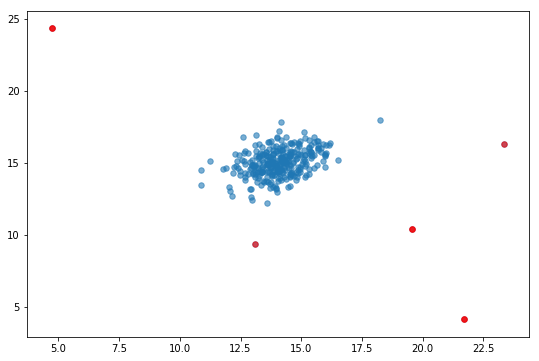

In [16]:
outliers = np.where(p<epsilon)

fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:,1], alpha=0.6, s=30)
ax.scatter(X[outliers[0], 0], X[outliers[0],1], s=30, c='r', marker='o', alpha=0.6)